# Problem Formlation

**BCG's** Client called **PowerCo** a major **gas** and **electricity** utility that supplies to small and medium sized enterprises, the energy market has had a lot of change in recent years and there are more options than ever for customers to choose from, sothat **PowerCo** are concerned about their customers leaving for better offers from other energy providors.

When a customer leaves to use another service providor that's called **"Churn"**

This becoming a big issue for **PowerCo** and they have engaged **BCG** to help diagnose **the reason why** their customers are **"Churning"**

In this Notebook we will make Exploratory Data Analysis "EDA" to identify what are the reasons for customer leaving is the problem about the price or another reason

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Loading Datasets**
we have two datasets:

df_c -> contain all clients information

df_p -> contain all prices through the year by reference date and for each client's ID

In [ ]:
df_c = pd.read_csv('/content/client_data.csv')
df_p = pd.read_csv('/content/price_data.csv')

Checking each dataset's Information such as features, Dtypes and some statistics

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [ ]:
df_c.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [ ]:
df_p.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [ ]:
df_c.nunique()

,0
id,14606
channel_sales,8
cons_12m,11065
cons_gas_12m,2112
cons_last_month,4751
date_activ,1796
date_end,368
date_modif_prod,2129
date_renewal,386
forecast_cons_12m,13993


In [ ]:
df_p.nunique()

,0
id,16096
price_date,12
price_off_peak_var,1853
price_peak_var,1189
price_mid_peak_var,711
price_off_peak_fix,66
price_peak_fix,31
price_mid_peak_fix,28


In [ ]:
# Categorical Features in Client dataset
c_cat = df_c.select_dtypes(include=['object']).columns.to_list()
# Numerical Features in Client dataset
c_num = df_c.select_dtypes(include=['int64','float64']).columns.to_list()
# Numerical Features in the dataset of prices
p_num = df_p.select_dtypes(include=['int64','float64']).columns.to_list()

# **Distribution**

#### Client Dataset

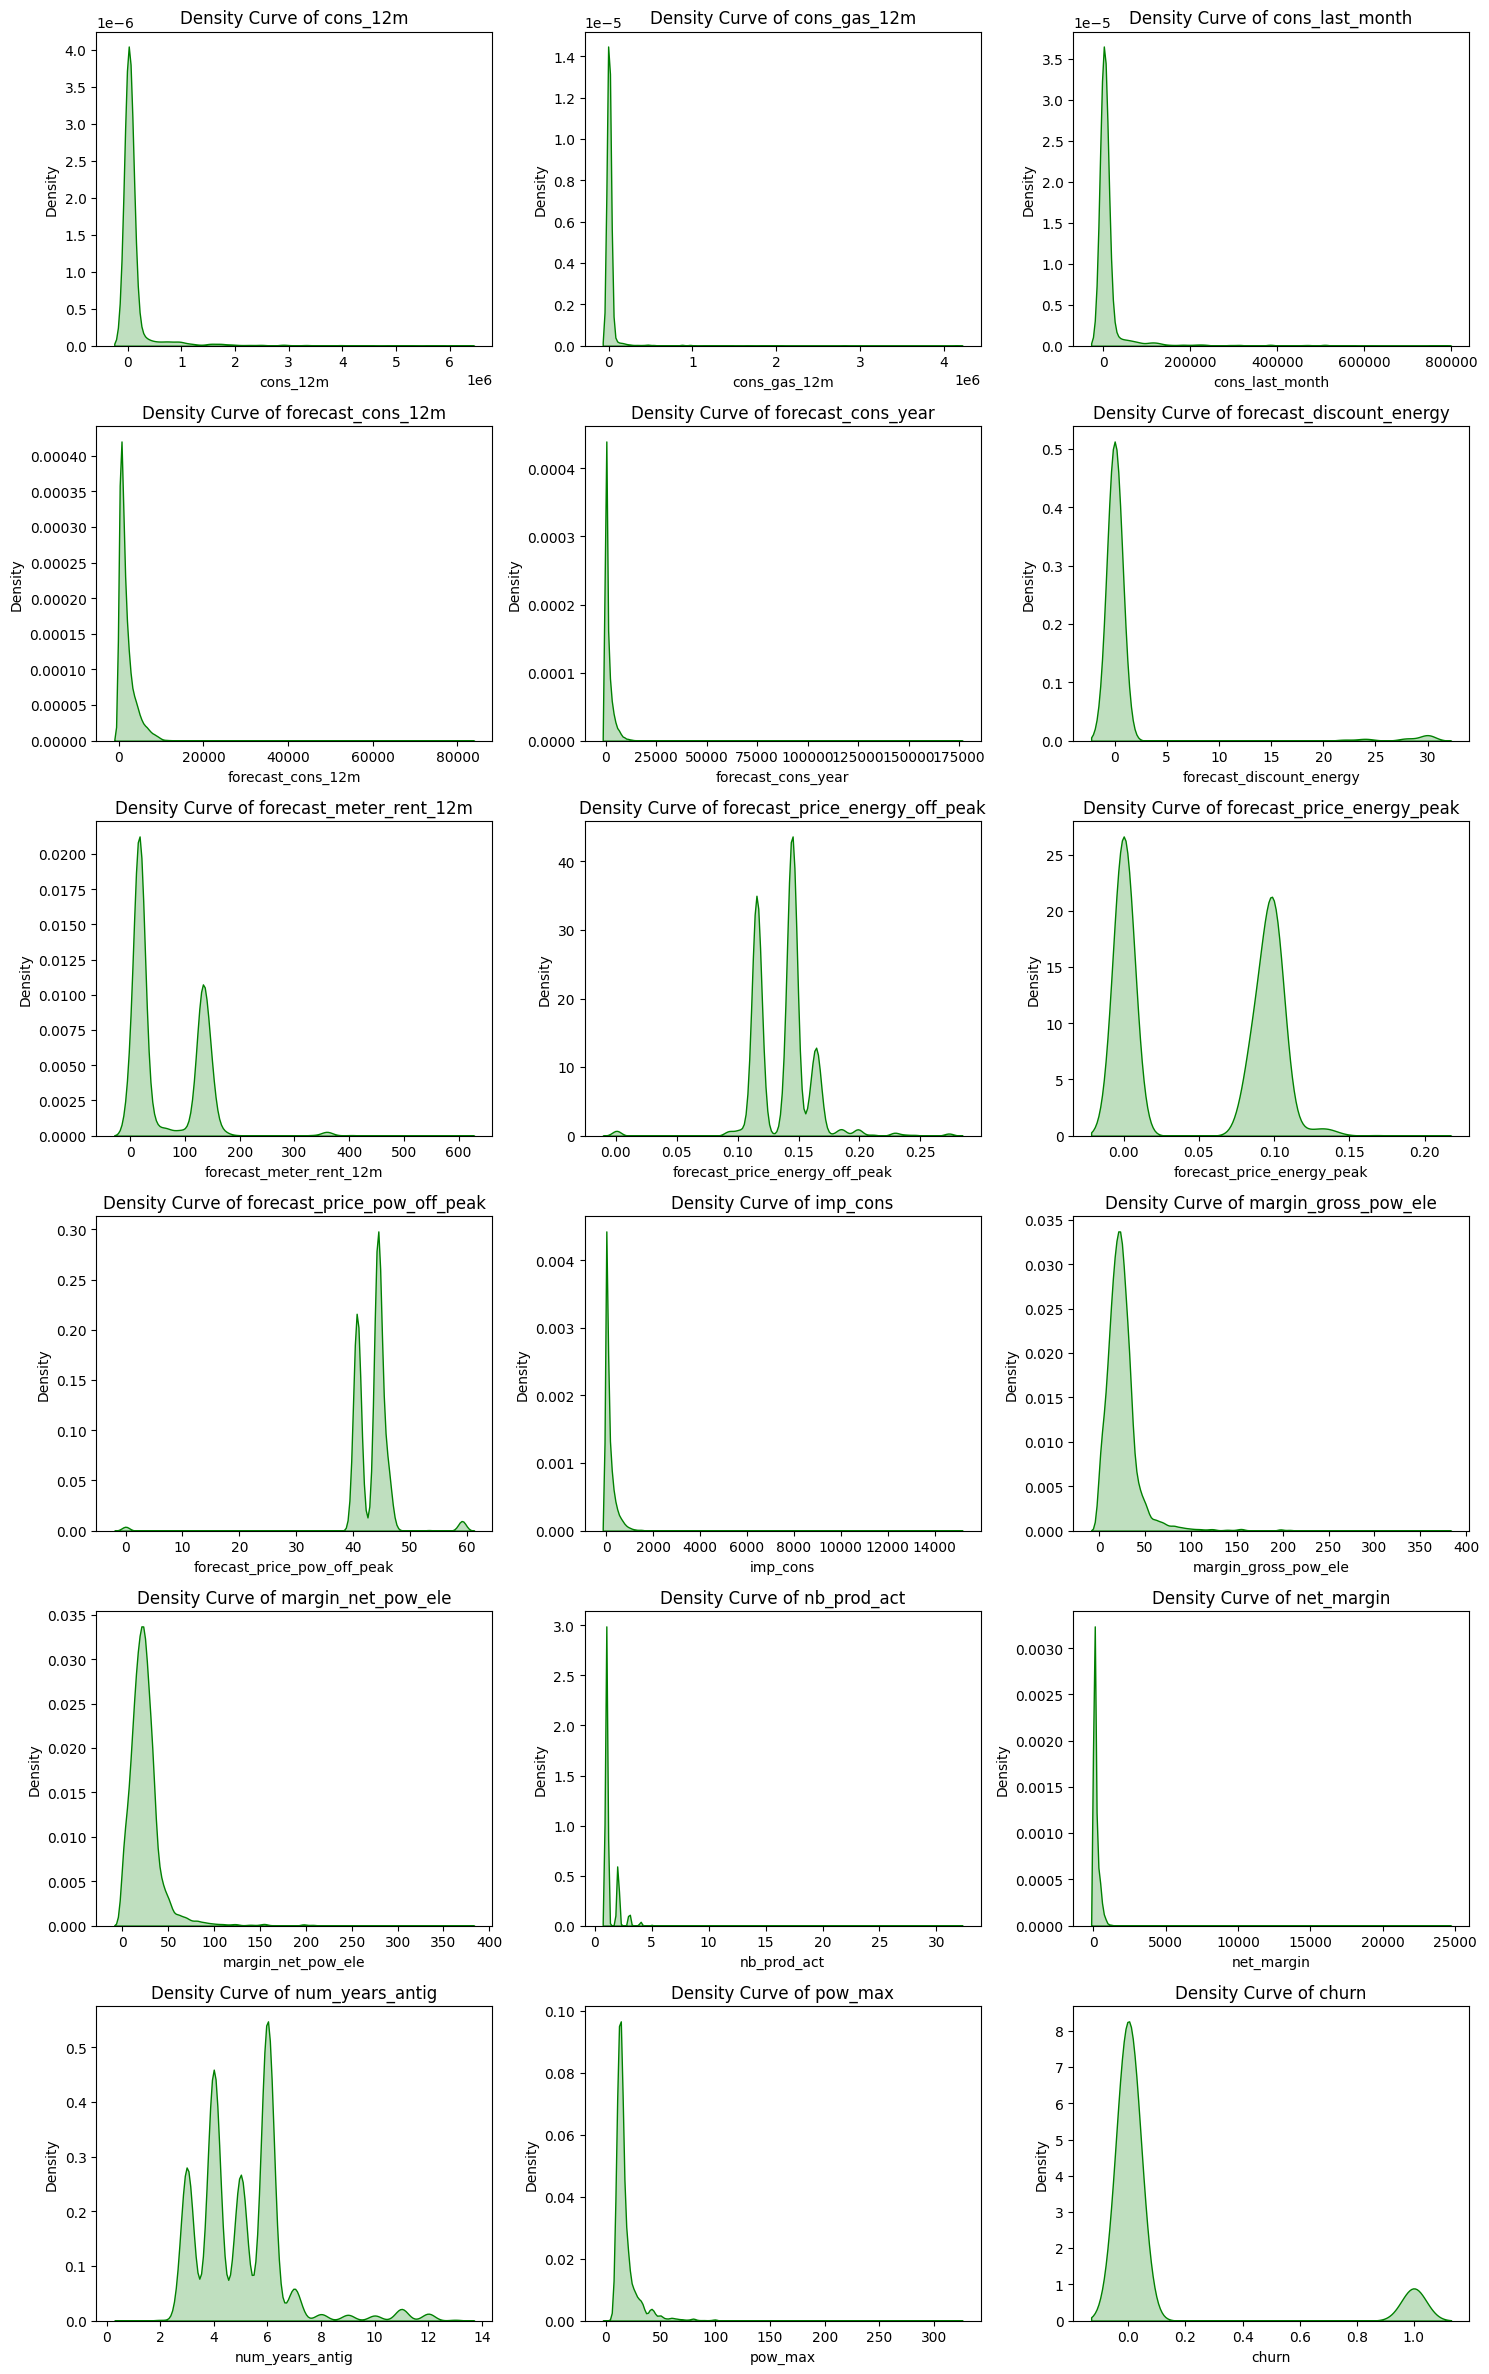

In [ ]:
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(c_num) // n_cols)  # Calculate rows (round up)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Create distribution plots
for i, feature in enumerate(c_num):
    sns.kdeplot(df_c[feature], ax=axes[i], color='green', fill=True)
    axes[i].set_title(f"Density Curve of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Distributions using Boxplot

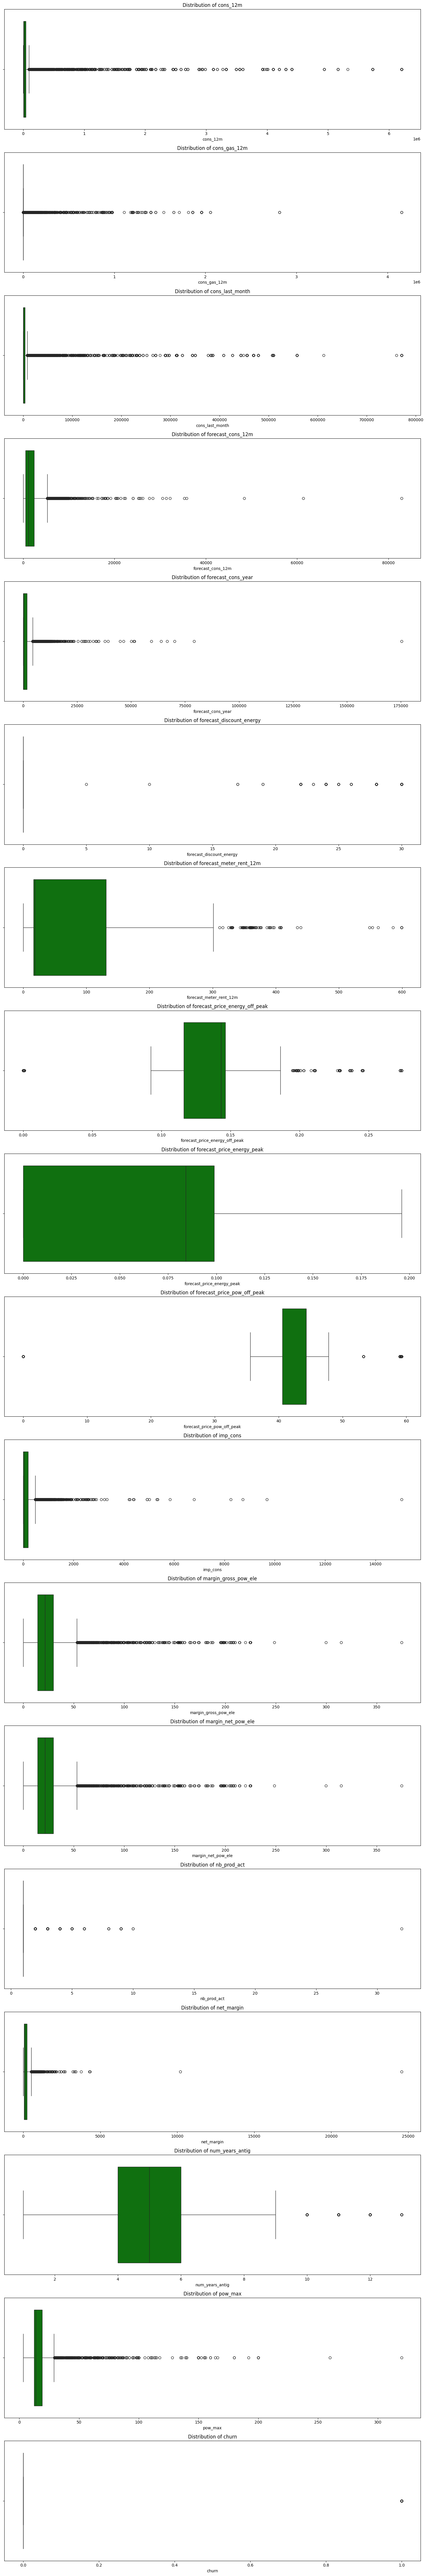

In [ ]:
n_cols = 1  # Number of columns in the grid
n_rows = (len(c_num) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5* n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot each distribution
for i, col in enumerate(c_num):
    sns.boxplot(df_c[col], ax=axes[i], color='green', orient='h')
    axes[i].set_title(f'Distribution of {col}')

# Hide any empty subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


We see that most of the features in the client dataset contain many outliers, so we can't classify all these data points as errors.

It must be the nature of this type of data; therefore, in the model selection step, we need to choose a machine learning model that is robust to outliers.

--------------------------------------------------------------------------------


Pie Chart of the Churn Percentage

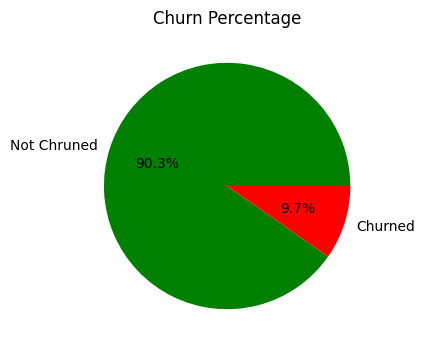

In [ ]:
churn_count = df_c['churn'].value_counts()
labels = ['Not Chruned', 'Churned']
colors = ['green','red']

plt.figure(figsize=(8,4))
plt.pie(churn_count, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Churn Percentage')
plt.show()

We are facing a highly imbalanced target distribution of approximately 90-10% indicating a strong imbalance.

--------------------------------------------------------------------------------


#### What percenatge of clients who subscribe for the gas serivce and who are not?

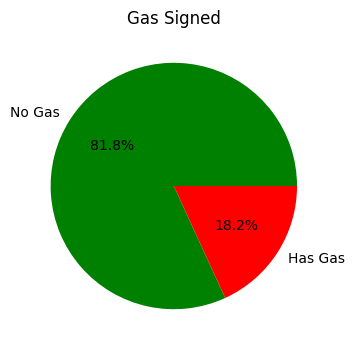

In [ ]:
gas_signed = df_c['has_gas'].value_counts()
labels = ['No Gas', 'Has Gas']
colors = ['green','red']
plt.figure(figsize=(8,4))
plt.pie(gas_signed, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Gas Signed')
plt.show()

#### Who benefits of the most of the discounts?

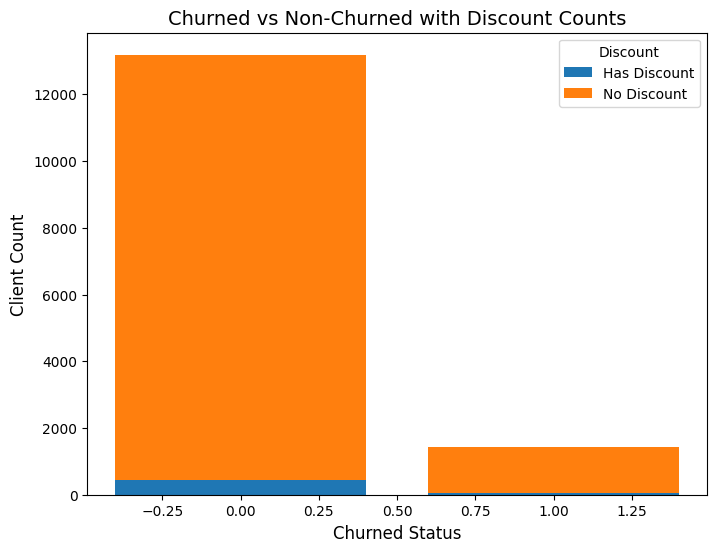

In [ ]:
df_c['Discount Category'] = df_c['forecast_discount_energy'].apply(lambda x: 'No Discount' if x == 0 else 'Has Discount')

grouped = df_c.groupby(['churn', 'Discount Category']).size().unstack(fill_value=0)

# Plotting
categories = grouped.index  # Churned categories ('Yes', 'No')
discounts = grouped.columns  # Discount categories ('10%', '20%', '30%')

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Stack the bars
bottom = [0] * len(categories)  # Initialize the bottom for stacking
for discount in discounts:
    values = grouped[discount]
    ax.bar(categories, values, label=discount, bottom=bottom)
    bottom = [i + j for i, j in zip(bottom, values)]  # Update bottom for stacking

# Add labels, title, and legend
ax.set_title("Churned vs Non-Churned with Discount Counts", fontsize=14)
ax.set_xlabel("Churned Status", fontsize=12)
ax.set_ylabel("Client Count", fontsize=12)
ax.legend(title="Discount", fontsize=10)

# Show the plot
plt.show()

Most of the discounts were taken by clients who remained with the company, while most of the churned clients received fewer discounts.

We should keep in mind that discounts should be primarily offered to clients at risk of churn.

---



#### What are the churn precentage of each channel sales campaign?

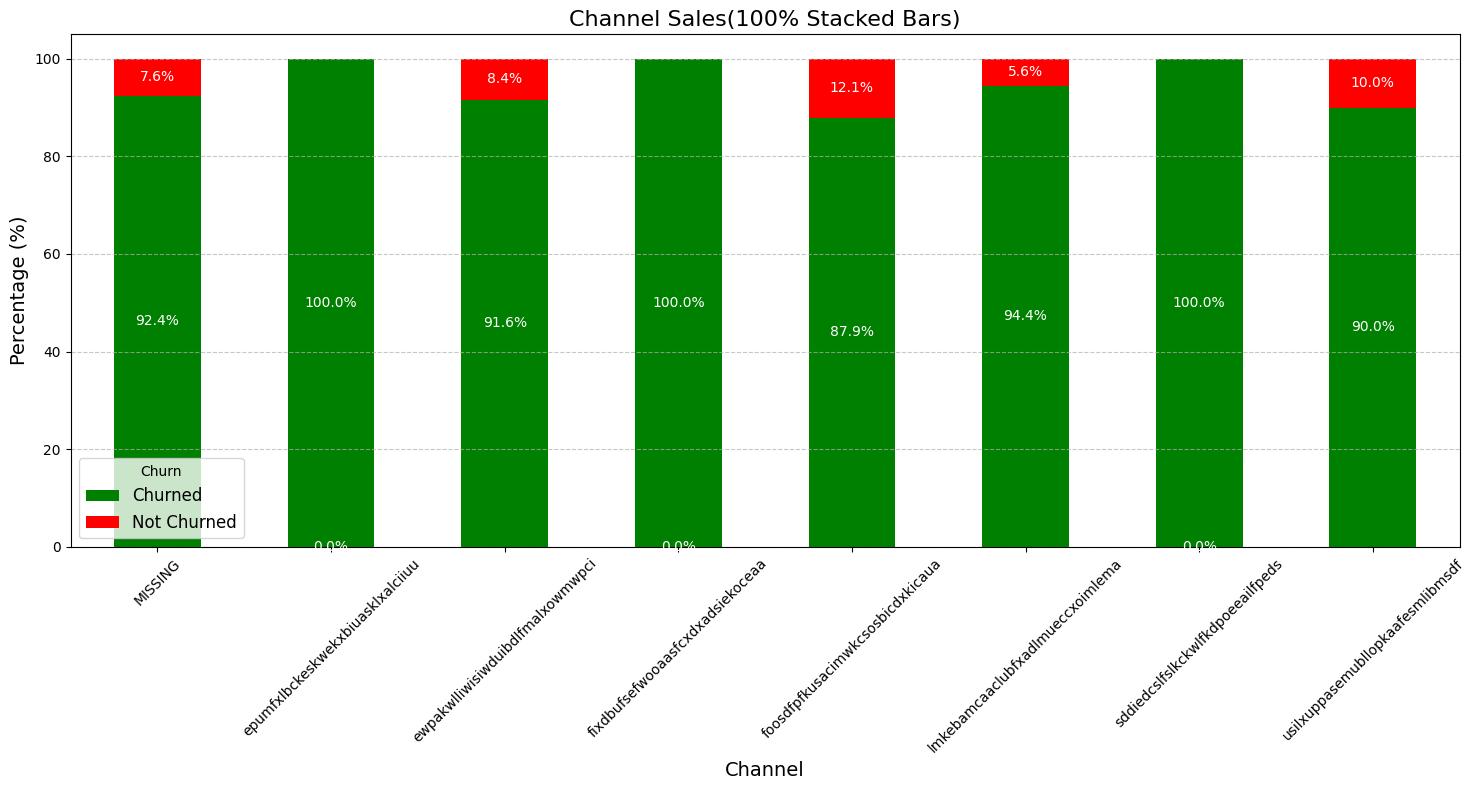

In [ ]:
# Count IDs by channel and churn status
channel_churn_counts = df_c.groupby(['channel_sales', 'churn']).size().unstack(fill_value=0)

# Convert counts to percentages
channel_churn_percentages = channel_churn_counts.div(channel_churn_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(15, 8))
channel_churn_percentages.plot(
    kind='bar', stacked=True, color=['green', 'red'], ax=ax, width=0.5
)

# Add chart details
plt.title('Channel Sales(100% Stacked Bars)', fontsize=16)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Display the percentages on the bars
for c in ax.containers:
    ax.bar_label(
        c,
        fmt='%.1f%%',
        label_type='center',
        fontsize=10,
        color='white'
    )

plt.tight_layout()
plt.show()

Channel Sales, which have churn percentages of 12.1%, 10%, and 8.4%, must be reviewed by the company to identify the reasons why most of the churned clients came from this channel.

The company should analyze the packages offered to clients and work on improving them.


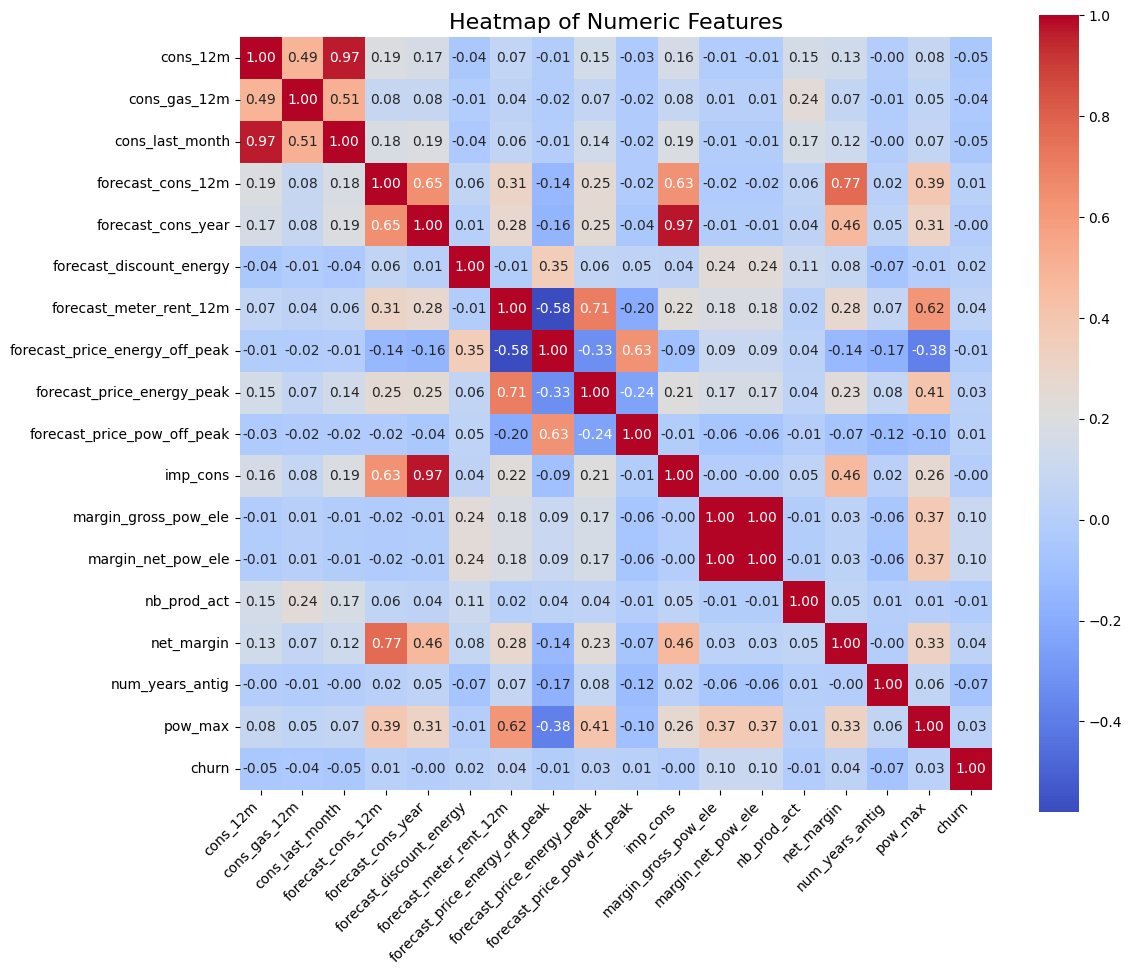

In [ ]:
#df_numeric = df[numeric_features]

# Compute the correlation matrix
correlation_matrix = df_c[c_num].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Customize the plot
plt.title("Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#### Heatmap:

The features that most affect customer churn are margin_gross_pow_ele "Gross margin on power subscription", margin_net_pow_ele "Net margin on power subscription", and num_years_antig "Antiquity of the client".

Therefore, our first conclusion is that the reasons for customer churn are not related to the prices of energy services.

# Prices Dataset

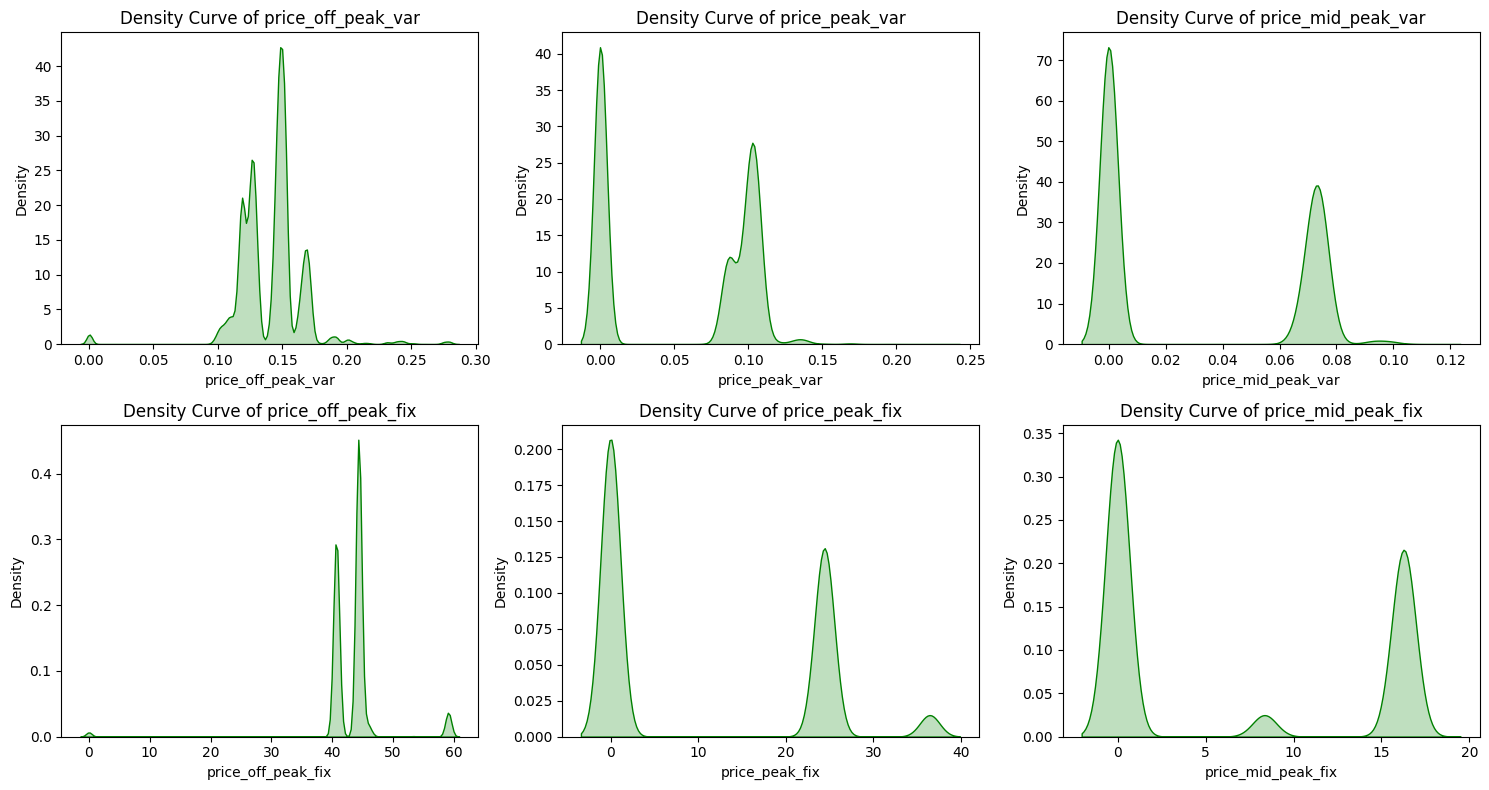

In [ ]:
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(p_num) // n_cols)  # Calculate rows (round up)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Create distribution plots
for i, feature in enumerate(p_num):
    sns.kdeplot(df_p[feature], ax=axes[i], color='green', fill=True)
    axes[i].set_title(f"Density Curve of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Bimodal distribution**


Most of the distributions have a bimodal distribution pattern, which is because each distribution has more than one peak, like in the price_peak_var, which represents the price of energy.

### **Prices**

The distribution of Power Service prices is higher compared to energy prices, reflecting the different nature of their types. Energy prices may fluctuate more due to consumption patterns, while power prices are likely determined by infrastructure and fixed costs.

The distinct separation in pricing during different times suggests opportunities for tailored pricing strategies or energy-saving recommendations for consumers based on their usage patterns.

### **Important Note:**

While off-peak periods typically offer lower energy prices, "fix" power prices remain relatively high, clustered around 40-50.

This inconsistency might dissuade cost sensitive customers who expect off-peak rates to be significantly lower overall.




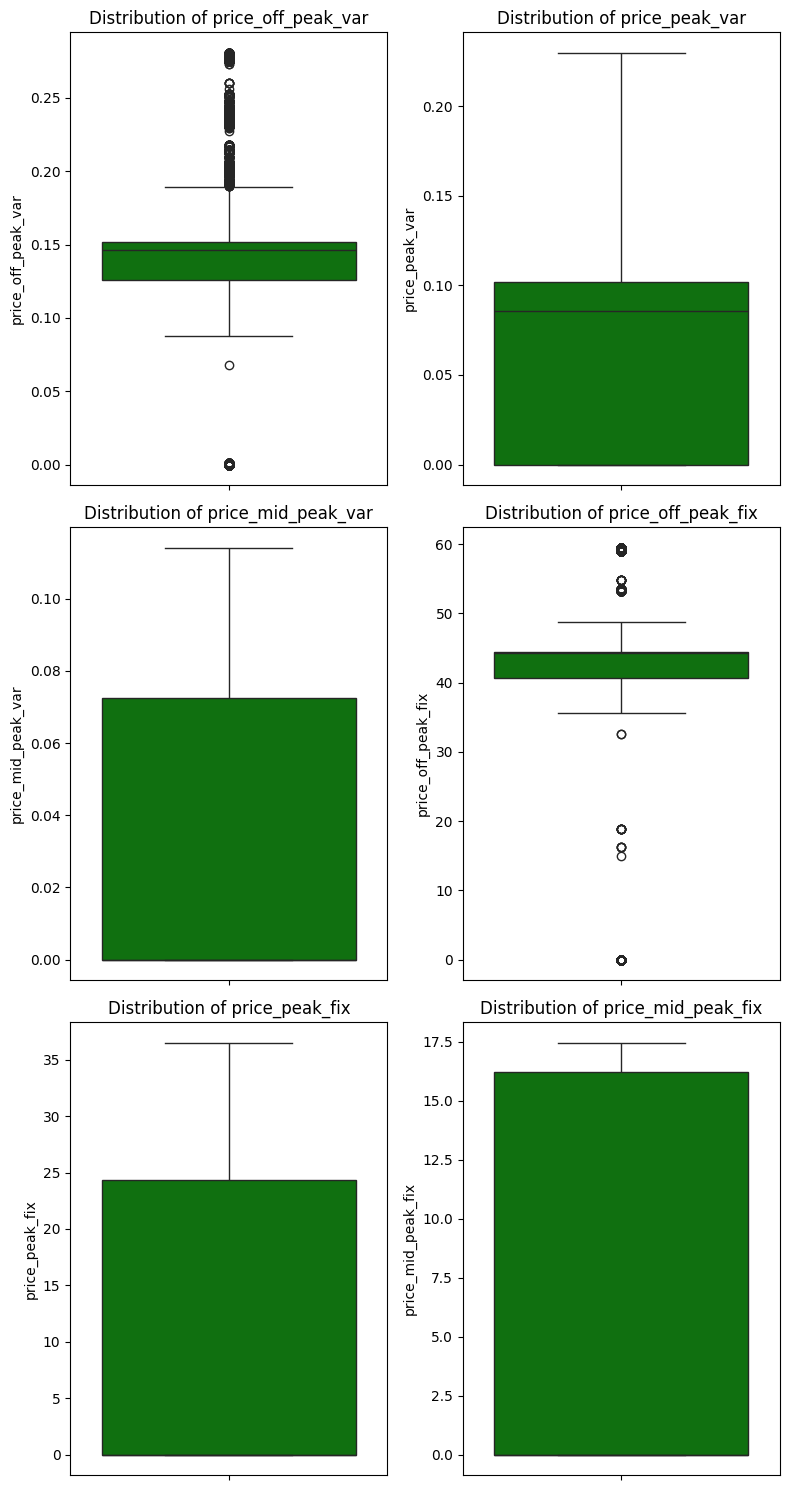

In [ ]:
n_cols = 2  # Number of columns in the grid
n_rows = (len(p_num) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and plot each distribution
for i, col in enumerate(p_num):
    sns.boxplot(df_p[col], ax=axes[i], color='green')
    axes[i].set_title(f'Distribution of {col}')

# Hide any empty subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

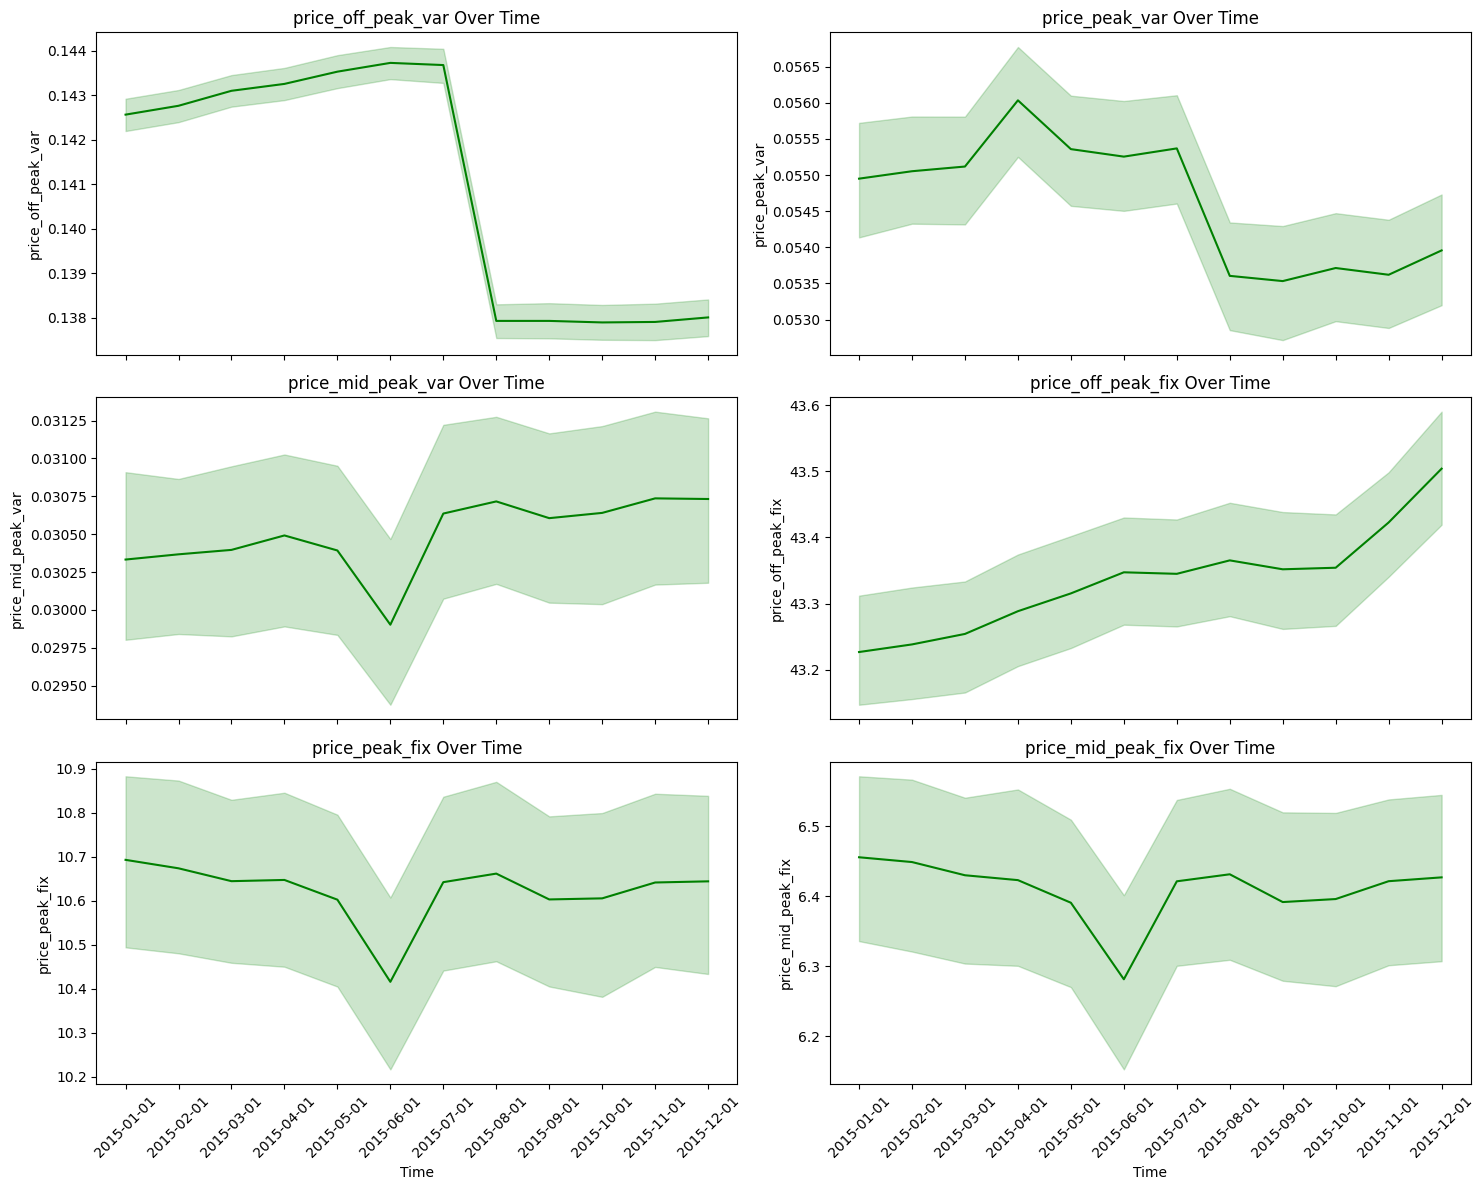

In [ ]:
n_cols = 2  # Number of columns in the grid
n_rows = -(-len(p_num) // n_cols)  # Calculate rows (round up)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), sharex=True, sharey=False)
axes = axes.flatten()

# Create line plots for each feature
for i, feature in enumerate(p_num):
    sns.lineplot(x='price_date', y=feature, data=df_p, ax=axes[i], color='green')
    axes[i].set_title(f"{feature} Over Time", fontsize=12)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### "var" Prices of Enegry Over Time:

* Off-Peak shows a significant downward trend in June 2015, continuing to decrease until it stabilizes from July 2015 onward.
* Peak Time experiences a high point in April 2015, then gradually decreases until August 2015, after which it appears to be relatively stable.
* Mid-Peak Time reaches a low in June 2015, then increases until July and continues to remain stable.


### "fix" Prices of Power Over Time:

* Off-Peak prices consistently increase throughout the year.
* Peak Time of Power follows the same pattern as the Mid-Peak of Energy.
* Mid-Peak Time of Power follows exactly the same pattern as the Peak Time of Power prices.

### **Conclustion:**

We observe an unreasonable increase in power service prices during off-peak periods for all clients. This is concerning, as customers generally expect off-peak times to offer lower costs, allowing them to reduce their consumption accordingly.



